# Laboratory Work: Pichu and Pikachu Classification

## 1. Test points classification.

In this laboratory exercise, we will use data on the lengths and widths of Pichus and Pikachus to develop an algorithm for classifying new data points.

### Loading Data
Let's begin by loading the data.

In [31]:
import pandas as pd
import numpy as np

pok = pd.read_csv(".\\datapoints.txt")

# as for now, I feel more convenient with the visualization of arrays rather than data frames
numpok = pok.to_numpy()

# as the separator was "," there was the fourth column "1-pikachu" with no data, which I will just drop.
pokemon = numpok[:,:-1]
print (pokemon[:5])

# the first column is width, the second is height and the third is the label
# 0 is pichu, 1 is pikachu

[[21.9593845  31.23956701  0.        ]
 [23.63591632 36.46821491  1.        ]
 [17.71405642 31.44170391  0.        ]
 [21.78020032 33.21339776  1.        ]
 [25.20630553 36.55881615  1.        ]]


###  Data Visualization
For visualization purposes, we will plot all the data points, assigning a unique color to each class.


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def pok_to_plot (pok_array, str_color_scheme, num_lbld_classes, list_of_ticks, list_of_ticklbls):
    # ranges in the square brackets (pok_array []) are going to be: [rows, columns], as the 1st dimension is rows and the 2nd is columns    
    plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))
    cbar = plt.colorbar(shrink = 0.3) 
    cbar.set_ticks(list_of_ticks)
    cbar.set_ticklabels(list_of_ticklbls)
    plt.title ("Pokemon size")
    plt.xlabel("Width")
    plt.ylabel("Height")

C:\Users\Mary\AppData\Local\Temp\ipykernel_22940\1719151271.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))


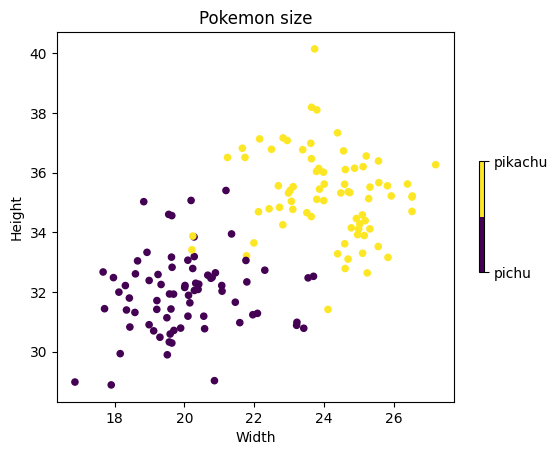

In [34]:
pok_to_plot (pokemon, "viridis", 2, [0,1], ["pichu", "pikachu"])

In [35]:
import csv

with open(".\\testpoints.txt") as file:
    reader = csv.reader(file)
    testpoints = list(reader)

print (testpoints)

[['Test points:'], ['1. (25', ' 32)'], ['2. (24.2', ' 31.5)'], ['3. (22', ' 34)'], ['4. (20.5', ' 34)']]


The output doesn't look like smth I would like to work with, so I guess we need some data manipulations

In [36]:
# First, we remove the table name ("Test points")

testpoints.pop(0)
print (testpoints)

[['1. (25', ' 32)'], ['2. (24.2', ' 31.5)'], ['3. (22', ' 34)'], ['4. (20.5', ' 34)']]


In [37]:
# Then we remove non-numerical symbols. For larger datasets we could have used the remove function, 
# but here we'll put it simple, with slicing

for obj in testpoints:
    obj[0] = obj[0][4:]
    obj[1] = obj[1][1:3]
    
print (testpoints)

[['25', '32'], ['24.2', '31'], ['22', '34'], ['20.5', '34']]


In [38]:
# They need some labels as well. 
# As we don't know who exactly they are yet, they will have label 0.5, which is numerically in between pichu and pikachu.

for obj in testpoints:
    obj.append(0.5)
print (testpoints)

[['25', '32', 0.5], ['24.2', '31', 0.5], ['22', '34', 0.5], ['20.5', '34', 0.5]]


Now we are going to add the lines with the new pokemons to the existing ndarray "pokemon". We'll create a new ndarray, called "new_pokemon"

In [39]:
testpoints_2d = np.array(testpoints, dtype=float)
print (testpoints_2d)

[[25.  32.   0.5]
 [24.2 31.   0.5]
 [22.  34.   0.5]
 [20.5 34.   0.5]]


In [40]:
new_pokemon = np.append(pokemon, testpoints_2d, axis = 0)

print(new_pokemon[-7:,:])

[[19.64060341 30.29155673  0.        ]
 [21.98995395 33.64590281  1.        ]
 [22.30210324 32.73237945  0.        ]
 [25.         32.          0.5       ]
 [24.2        31.          0.5       ]
 [22.         34.          0.5       ]
 [20.5        34.          0.5       ]]


Let's add the test data to the plot.

C:\Users\Mary\AppData\Local\Temp\ipykernel_22940\1719151271.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))


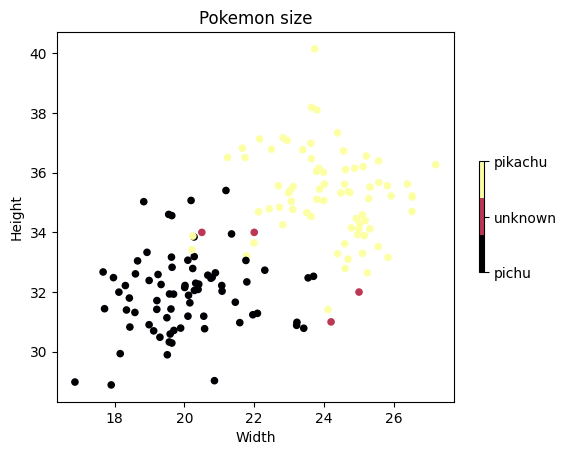

In [41]:
pok_to_plot (new_pokemon, "inferno", 3, [0, 0.5, 1], ["pichu", "unknown", "pikachu"])

### Classification.

In [42]:
def ordered_distances (point_to_sort, based_on_data=pokemon):
    """
    :param point_to_sort: list - a list containing pokemon-to-classify's parameters: list[0] is width, list[1] is height.
    :param based_on_data: default - pokemon; 2D array, or list of lists, each list having:
      list [0] as a width of a known pokemon, 
      list [1] - lenght of a known pokemon, 
      list [2] - the class label, 0 for pichu, 1 for pikachu 
    :return: list - a list of sorted distances.

    """
    distances = []
    import math
    
    x2 = float(point_to_sort[0])
    y2 = float(point_to_sort[1])

    for pokemons in based_on_data:
        x1 = pokemons[0]
        y1 = pokemons[1]
        lbl = pokemons[2]
        
        distance = math.sqrt((x2-x1)**2+(y2-y1)**2)
        
        #creating a sublist, where the distance to each known pokemon is stored with the labeled pokemon class
        item=[]
        item.append(distance)
        item.append(lbl)
        
        distances.append(item)

    import operator as opr
    distances_list = sorted (distances, key = opr.itemgetter(0))

    return distances_list   

In [43]:
def sorting_hat (parameters, distances_list):
    """ 
    Makes a guess based on one nearest neighbour. 
    
    """
    
    nearest_neighbour = distances_list[0][1]
    msg = f"The pokemon with parameters {parameters} looks like "
    if nearest_neighbour == 0:
        print (msg + "pichu")
    elif nearest_neighbour == 1:
        print (msg + "pikachu")
    else:
        print ("This should have never happened. You probably need some data cleaning.")


In [84]:
def decision_multi_neighbours (parameters, distances_list, num_neighbours=10, printing=True):
    """
    Classifies the pokemon based on num_neighbours number of neighbours. 
    
    """
   
    more_neighbours = []
    for i in range (num_neighbours):
        more_neighbours.append(distances_list[i][1])

    counter_pichu = 0
    counter_pikachu =0

    for pok in more_neighbours:
        if pok == 0:
            counter_pichu += 1
        elif pok == 1:
            counter_pikachu += 1
        else:
            print ("Address technical support")

    msg = f"Based on {num_neighbours} neighbours, the pokemon with the parameters {parameters} is classified as "
    if counter_pichu > counter_pikachu:
        if printing == True:
            print(f"{msg} pichu, \nprobability is {(counter_pichu/num_neighbours)*100:.1f}%\n\n")
        return 0
    elif counter_pikachu > counter_pichu:
        if printing == True:
            print (f"{msg} pikachu, \nprobability is {(counter_pikachu/num_neighbours)*100:.1f}%\n\n")
        return 1
    else:
        print ("We need more nearest neighbours to decide. Contact your Data Scientist.")

In [ ]:
# creating a dictionary, where the key is the pokemon's coordinates and the value is the distance to all the classified points

def dictionary_maker (some_array, based_on_data=pokemon):
    poks_to_classify = {}
    for point in some_array:
        poks_to_classify[f"w={point[0]}, h={point[1]}"] = ordered_distances(point, based_on_data)  
    return poks_to_classify

poks_to_classify = dictionary_maker (testpoints)
print (poks_to_classify)

Now we can finally classify our pokemons, using one- or multi- neighbours methods:

In [46]:
for key, value in poks_to_classify.items():
    sorting_hat (key, value)

The pokemon with parameters w=25, h=32 looks like pikachu
The pokemon with parameters w=24.2, h=31 looks like pikachu
The pokemon with parameters w=22, h=34 looks like pikachu
The pokemon with parameters w=20.5, h=34 looks like pichu


In [85]:
for key, value in poks_to_classify.items():
    decision_multi_neighbours (key, value)

Based on 10 neighbours, the pokemon with the parameters w=25, h=32 is classified as  pikachu, 
probability is 80.0%


Based on 10 neighbours, the pokemon with the parameters w=24.2, h=31 is classified as  pichu, 
probability is 60.0%


Based on 10 neighbours, the pokemon with the parameters w=22, h=34 is classified as  pikachu, 
probability is 70.0%


Based on 10 neighbours, the pokemon with the parameters w=20.5, h=34 is classified as  pichu, 
probability is 80.0%




Which shows that the pokemon with parameters w=24.2, h=31 is 10% probable is pichu, than pikachu, though its first nearest neighbour is pikachu.

## 2. User's input classification.

We need the user's input first.
We also have to insure the correct output.

In [50]:
msg = "Please measure your pokemon's "
if_mistake = "Wrong input. Please try again."
def get_parameter (parameter_name, param_msg = msg, error_msg = if_mistake): 
    """
    Asks for pokemon's parameters. Makes sure the input is numeric.

    """   
    while True:    
        try:
            param = float(input(msg + parameter_name))
            return param
        except: 
            print (error_msg)
        else:
            break

In [51]:
def measure_your_pok (parameter_name, too_big=55, too_small=12):
    """
    Makes sure the parameters are above zero, and also trustworthy

    """
    
    info = "Pichu is baby Pikachu. Your pokemon is  "
    param = 0
    while (param <= 0):
        param = get_parameter(parameter_name)
    check = False
    if param <= too_small:
        print (f"{info} too small to be Pichu. \n Is it probably Joltik? Joltik is also yellow.")
    elif param >= too_big:
        print (f"{info} too big to be Pikachu. \n Is it probably Raichu? Raichu is an adult Pikachu.")
    else:
        check = True
    if check == True:
        return param


Here we go with the user's input.

In [52]:
parameters = []

width = measure_your_pok ("width")
parameters.append(width)
print(width)

25.0


In [53]:
height = measure_your_pok ("height")
parameters.append(height)
print (height)

26.0


In [54]:
print (parameters)

[25.0, 26.0]


Shall we visualize the user's pokemon?

In [55]:
lbld_parameters = []
lbld_parameters.append(width)
lbld_parameters.append(height)
lbld_parameters.append(0.5)

print (lbld_parameters)

[25.0, 26.0, 0.5]


C:\Users\Mary\AppData\Local\Temp\ipykernel_22940\1719151271.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pok_array[:,0], pok_array[:,1], s = 20, c = pok_array[:,2], cmap = plt.cm.get_cmap(str_color_scheme, num_lbld_classes))


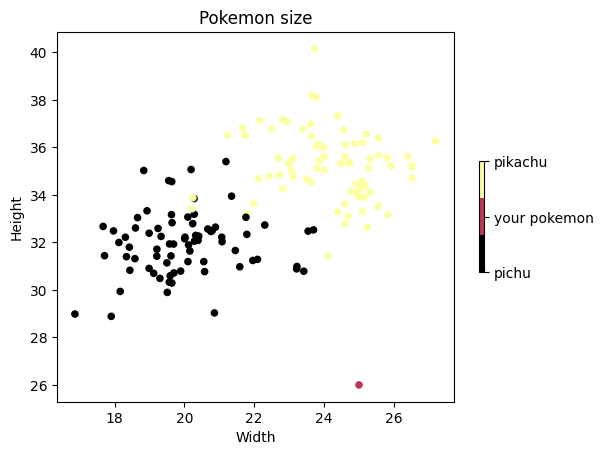

In [56]:
# np.vstack() stacks arrays in sequence vertically (row wise).

users_pokemon = np.vstack([pokemon, lbld_parameters])
pok_to_plot (users_pokemon, "inferno", 3, [0, 0.5, 1], ["pichu", "your pokemon", "pikachu"])

Let's classify it based on 10 nearest neighbours.

In [ ]:
the_distances = ordered_distances (parameters)
print (the_distances)

In [58]:
decision_multi_neighbours (parameters, the_distances)

Based on 10 neighbours, the pokemon with the parameters [25.0, 26.0] is classified as  pichu, 
possibility is 90.0%




0

## 3. Bonustasks

In this part we are going to divide the original dataset into test data and training data, and count the accuracy of our "model" predictions.

In [93]:
def predict_counter (test_dict, check_dict, printing_res=False, printing_ac=True):
    '''
    Compares the predictions for test points to their original class/
    Test dictionary contains the collection of distances from each point in the test dataset to each point of the training dataset.
    Check dictionary contains control labels - data from the original dataset for every testpoint.
    
    '''

    check_list = []
    for key, value in test_dict.items():
        # we will make conclusions based on  nearest neighbours
        # False parameter is raised not to print texts
        predicted_label = decision_multi_neighbours (key, value, 11, False)
        if float(predicted_label) == check_dict[key]:
            check_list.append (True)
        else:
            check_list.append (False)
            if printing_res == True:
                print (f"Is predicted {float(predicted_label)} at {key} while actual label is {check_dict[key]}")

    true_predictions = check_list.count (True)
    total_predictions = len(check_list)
    accuracy = true_predictions / total_predictions

    if printing_ac == True:
        print (f"{accuracy = }")
    return accuracy

In [94]:
def bonus_flow(printing = False):
    """
    This is the main function of this bonus task.
    
    """
    if printing == True:
        print (f"\nHere we come!")
        
    # We create subarrays with pichus and pikachus, to later ensure their equal proportions in training and test datasets
    pichus_shuffled = get_subarray(0)
    pikachus_shuffled = get_subarray(1)
    
    # Then we randomize their order
    np.random.shuffle(pikachus_shuffled)
    np.random.shuffle(pichus_shuffled)

    # Just to check shuffle works the way we want it to work
    if printing == True:
        print(f"pikachus_shuffled first 2 elements are \n{pikachus_shuffled[:2,]}")
        print(f"pichus_shuffled first 2 elements are \n{pichus_shuffled[:2,]}")
    
    # Creating training data and test data arrays
    train_pikachu = pikachus_shuffled[:50]
    train_pichu = pichus_shuffled[:50]
    train_data = np.vstack((train_pikachu, train_pichu))

    test_pikachu = pikachus_shuffled[50:]
    test_pichu = pichus_shuffled[50:]
    test_data = np.vstack((test_pikachu, test_pichu))
    
    # We need dictionaries to make predictions and check their accuracy
    test_poks_dict = dictionary_maker(test_data, train_data)

    # Control dictionary
    same_keys_dictionary = {}
    for point in test_data:
        same_keys_dictionary[f"w={point[0]}, h={point[1]}"] = point[2] 
    
    accuracy = predict_counter(test_poks_dict, same_keys_dictionary, printing_ac=False)
    
    return accuracy

In [65]:
def get_subarray (lbl, orig_array=pokemon):
    '''
    Creates an array with 1 class pokemon

    '''

    mask = orig_array[:, 2] == lbl
    subarray = orig_array[mask]
    
    return subarray

Let's execute the functions above 10 times and save the results.

In [95]:
accuracy_list = []

for i in range (10):
    accuracy = bonus_flow()
    accuracy_list.append(accuracy)

print (accuracy_list)

[0.98, 0.96, 0.98, 0.92, 0.96, 1.0, 0.94, 0.92, 0.94, 0.96]


Average accuracy appears to be 96% :

In [96]:
mid_accuracy = sum(accuracy_list)/len(accuracy_list)
print (f"The average accuracy is {mid_accuracy:.2f}")

The average accuracy is 0.96


Let's visualize our tries:

Text(0, 0.5, 'Result')

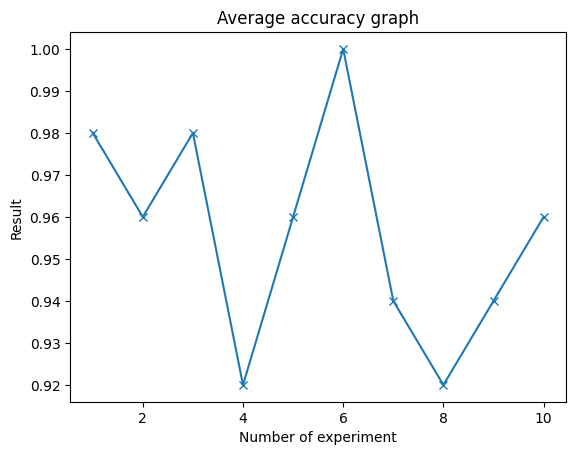

In [97]:
x = list (range(1,11))
plt.plot(x, accuracy_list, marker = "x")
plt.title ("Average accuracy graph")
plt.xlabel ("Number of experiment")
plt.ylabel ("Result")